# Pandas

By the end of this lecture, we'll be ready to import datasets from the Internet for analysis.

The pandas module provides all kinds of functionality for dealing with tables of data.  Python incorporates ideas from many places in its design, but Pandas was clearly inspired by the R programming language.



One big idea that made it into Pandas is that columns and rows in datasets want to be labeled; a plain array that just has the data but no labels is error-prone and harder to understand at a glance.


In [ ]:
import pandas as pd
import numpy as np

# Hotel ratings on a 5-star scale
my_data = np.array([[5, 5, 4], [2, 3, 4]])
print(my_data)
# Contrast with the labeled Pandas version
df2 = pd.DataFrame(my_data, columns = ["Hilton", "Marriott", "Four Seasons"])
df2 = df2.set_index([pd.Index(["Alice rating", "Bob rating"])])
df2


DataFrames also have functionality for dealing with more messy data, with missing values and different data types mixed in the same object.  Numpy arrays, by contrast, expect all values to be present and of the same type.

# .tsv and .csv files

The data that we'll import to DataFrames will very often be .tsv files - "Tab Separated Value" files - or .csv files - "Comma Separated Value."

.tsv and .csv are easily readable as text, as almost the whole format is described in the name.  .csv files contain the values in the table separated by commas (or newline to go to a new row), while .tsv files contain the data values separated by tabs (or newline to go to a new row).  A simple format makes it easy for anyone to read or edit the data.

Examples of what each file type looks like if you open it (CSV then TSV):

In [ ]:
5,5,4
2,3,4

In [ ]:
5    5    4
2    3    4

# Importing the data as a dataframe

The fundamental object that you interact with in Pandas is a DataFrame, which you can think of as a highly annotated array with mixed data types.  We'll first load a file into a dataframe.

If you're running in Google Colab, you'll first need to upload the file to Google colab.  Here is how to do that.  You can skip this cell if you're working locally with Jupyter notebook.

In [ ]:
# Skip this cell if not working in Google Colab
from google.colab import files

uploaded = files.upload() # pick starbucks_drinkMenu_expanded.csv

The above code should create a menu where the user can upload a file into Google colab's space.

Once you upload the file in that menu, you should be able to see the file with the system command ls, which lists files in a directory.  We put a ! before the command to indicate that we're using a system command instead of Python.

In [ ]:
!ls

Once that's done, or if you're working locally and have the necessary file in your current directory (the one where you launched Jupyter notebook), you can read the CSV file into a dataframe as follows.  (The head() method displays only the first few rows of a DataFrame, making it helpful for previewing files to see whether you have the data you expect.)

In [ ]:
import pandas as pd
df = pd.read_csv('starbucks_drinkMenu_expanded.csv', index_col = 'Beverage')
df.head()

One argument to read_csv that we haven't explained is index_col.  This determines which column will also be used to index into the data easily.  It makes the most sense to make this the column with the most specific "names" for the rows, which is Beverage in this example.  The loc property lets us look up values by index and column, even if the index doesn't uniquely identify a row.   (Notice that it uses square brackets instead of parens, hence its not being a "method" but a "property.")

In [ ]:
df.loc['Brewed Coffee','Calories'] # will retrieve the different sizes' calories

But we could have chosen a different column to be the index.

In [ ]:
df2 = pd.read_csv('starbucks_drinkMenu_expanded.csv', index_col = 'Beverage_category')
df2.head()

In [ ]:
df2.loc['Coffee', 'Calories']

# Constructors

We can get a better appreciation of the structure of these tables if we look at a constructor.  A numpy array can provide much of the data, but it has neither column names nor an index column.  If we supply both, the data is easier to read.  We can supply column names in the constructor and provide index values immediately after with set_index().

In [ ]:
import numpy as np

# Hotel ratings on a 5-star scale
my_data = np.array([[5, 5, 4], [2, 3, 4]])
df2 = pd.DataFrame(my_data, columns = ["Hilton", "Marriott", "Four Seasons"])
df2 = df2.set_index([pd.Index(["Alice", "Bob"])])
df2

Strictly speaking, we don't need the column names or the index for our DataFrame.  We can create a DataFrame from a numpy array that doesn't have either column or index names.  We can access elements using the iloc property, which relies on numbers instead of strings.

In [ ]:
df3 = pd.DataFrame(my_data) # plain numpy array as input
df3.head()

In [ ]:
df3.iloc[1,0]

A plain numpy array wouldn't work to build a table of mixed types, like having strings and integers both in the table, so DataFrames also have a constructor that takes a dictionary where the keys are column names and the values are columns, given as lists of equal length.

In [ ]:
my_data_dict = {
    "Gender" : ["F", "M"],
    "Hilton" : [5, 2],
    "Marriott": [5, 3],
    "Four Seasons": [4,4]
}
df4 = pd.DataFrame(my_data_dict)
df4 = df4.set_index([pd.Index(["Alice", "Bob"])])
df4

# Slicing the table

Suppose we want to iterate over all the items in a column or row.

It's easy to get a whole column to iterate over - just write tablename[columnname], as if the DataFrame were a dictionary and the column name a key.  When a column is removed from the table like this, it becomes a Series object.  Series can be iterated over using for loops; they're like annotated lists, or one-dimensional DataFrames.

In [ ]:
df4['Hilton']

In [ ]:
sum = 0
for i in df4['Hilton']:
    sum += i
print('Average Hilton Rating: ' + str(sum/len(df4['Hilton'])))

To get sections of the table that aren't simply columns, we can use the loc and iloc properties mentioned previously, which access values by names of the rows and columns (loc) or numbers of the rows and columns (iloc) respectively.   Both have a syntax of df.loc[row, col] or df.iloc[row,col].  : (colon) reprises its role that says "Give me all of these," resulting in a Series if it's one-dimensional.

In [ ]:
df2

In [ ]:
df2.loc[:, "Marriott"]

In [ ]:
df2.loc["Bob",:]

In [ ]:
df2

In [ ]:
df2.iloc[:, 2]

In [ ]:
df2.iloc[0,:]

In [ ]:
df.loc["Brewed Coffee",:]

In [ ]:
df.loc[:,'Beverage_prep']

Iterating over one of these slice results with a for loop works the way you would expect.

In [ ]:
# Iterating over Series returned by indexing
biggest_c = 0
calorie_list = df.loc["Brewed Coffee","Calories"] # 4 items
for c in calorie_list:
  if c > biggest_c:
    biggest_c = c
print(biggest_c)

Series objects can often be treated as numpy arrays and behave in the way you'd expect.  Here we show an arbitrary example of this - we can multiply a whole Series by 2 without a loop.


In [ ]:
df.loc['Brewed Coffee', 'Calories'] * 2

# Exercise

Write code that finds the highest amount of sugar (Sugars_g) among all the products in the Starbucks table.  You don't have to name the item.

In [ ]:
most_sugar = 0
for i in df['Sugars_g']:
    if i > most_sugar:
        most_sugar = i
print(most_sugar)

# Indexing with conditions

We can also index into the dataframe using expressions that evaluate to true or false for the cell.  The inner expression, "df['Calories'] > 300" creates a table full of true or false values.  (A numpy array would do something similar.)  Passing this to df again results in a smaller table with just the cells that evaluated to True.

In [ ]:
(df['Calories'] > 300)

In [ ]:
df[df['Calories'] > 300].head()

It's also possible to link together multiple criteria, in order to ask for all soymilk beverages that have more than 300 calories, for example.  The one catch is that you can't use normal boolean operators for this - that results in a type error, because those operators are for the single boolean values we were generating earlier in the course, not tables full of boolean values that need to be compared elementwise.  The operators &, |, and ~ act as and, or, and not in this context, respectively.

In [ ]:
df[(df['Calories'] > 300) & (df['Beverage_prep'] == 'Soymilk')]

# Exercise

Try creating a DataFrame that contains all beverages with no trans fat ("Trans_Fat_g") and more than 2 grams of protein ("Protein_g")

In [ ]:
df[(df['Protein_g'] > 2) & (df['Trans_Fat_g'] == 0)]

# Convenient mathematical functions

The Series objects that make up the columns of a DataFrame have a variety of convenient functions.

For example, there's an existing implementation of max() that would have made our previous efforts more concise.  And while max() finds the maximum value, idxmax() finds the index of that value - the name of the item instead of the value.

In [ ]:
print(df.loc[:, "Protein_g"].mean())
print(df.loc[:, "Protein_g"].max())
print(df.loc[:, "Protein_g"].idxmax()) # "argmax," gives index with biggest value

In fact, you can get the min, max, mean, median, standard deviation, and some percentiles all in one go using the describe() method.

In [ ]:
df.describe()

In [ ]:
df.describe()

The percentages give the 25th percentile, 50th percentile (median), and 75th percentile, i.e. 25% of the calorie values are 120 or less, and so on.  This gives a nice numerical first pass over the data that helps to give context to individual entries, like knowing 300 calories is a lot for a drink, or 4 grams is below average for a drink's protein.

# DataFrames Day 2

# Correlation

One mathematical function that is particularly interesting that Pandas makes very accessible is the correlation.  A correlation is a number between -1 and 1 that measures the extent to which two variables covary, with 1 for rising and falling in perfect sync, -1 for one variable always rising as the other falls, and 0 for no (linear) relationship between the variables.  Pandas will show the correlation of every pair of numerical columns in a table with the df.corr() function.

In [161]:
df.corr()

,Calories,Trans_Fat_g,Saturated_Fat_g,Sodium_mg,Total_Carbohydrates_g,Cholesterol_mg,Dietary Fibre_g,Sugars_g,Protein_g
Calories,1.000000,0.642818,0.331047,0.387892,0.795037,0.940034,0.384292,0.909675,0.578453
Trans_Fat_g,0.642818,1.000000,0.694871,0.707794,0.524176,0.439811,0.131267,0.419887,0.496317
Saturated_Fat_g,0.331047,0.694871,1.000000,0.920077,0.238142,0.161791,-0.093783,0.179255,0.287532
Sodium_mg,0.387892,0.707794,0.920077,1.000000,0.290295,0.199477,-0.060154,0.205969,0.496233
Total_Carbohydrates_g,0.795037,0.524176,0.238142,0.290295,1.000000,0.766654,0.173378,0.771407,0.410629
Cholesterol_mg,0.940034,0.439811,0.161791,0.199477,0.766654,1.000000,0.342040,0.984196,0.360449
Dietary Fibre_g,0.384292,0.131267,-0.093783,-0.060154,0.173378,0.342040,1.000000,0.184171,0.540274
Sugars_g,0.909675,0.419887,0.179255,0.205969,0.771407,0.984196,0.184171,1.000000,0.263061
Protein_g,0.578453,0.496317,0.287532,0.496233,0.410629,0.360449,0.540274,0.263061,1.000000


In general, a correlation's absolute value of 0.4 or less can be considered weak, an absolute value of 0.6 or more can be considered strong, and correlations between can be considered moderate.  However, this can depend on what's being studied - if the subjects are unpredictable people in a psychology experiment, a moderate result might be considered strong.

While the correlation function can perform three kinds of correlation - Pearson, Spearman's, and Kendall -- the default of Pearson is what people usually are referring to when they talk about correlations.

In [162]:
df.describe()

,Calories,Trans_Fat_g,Saturated_Fat_g,Sodium_mg,Total_Carbohydrates_g,Cholesterol_mg,Dietary Fibre_g,Sugars_g,Protein_g
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


Notice that, for the describe() and corr() tables, we're actually missing some columns that we would consider numerical, like 'Vitamin_A'.  This is where additional data cleaning becomes necessary.

# Checking the column names and types

Real data may be formatted somewhat annoyingly - if the whitespace doesn't match exactly, you may not succeed in naming the column you want.  Examining the .columns field of the dataframe can help you get the proper names for things.  (This file already had its names cleaned up, but did have excess whitespace before.)

In [163]:
df.columns

Index(['Beverage_category', 'Beverage_prep', 'Calories', 'Total_Fat_g',
       'Trans_Fat_g', 'Saturated_Fat_g', 'Sodium_mg', 'Total_Carbohydrates_g',
       'Cholesterol_mg', 'Dietary Fibre_g', 'Sugars_g', 'Protein_g',
       'Vitamin_A', 'Vitamin_C', 'Calcium', 'Iron', 'Caffeine_mg'],
      dtype='object')

There may also be columns that seem to be mostly numerical, but a stray string value causes the whole column to be interpreted as strings.  Looking at the dtypes field can help catch these.  In our file here, a "Varies" note under "Caffeine_mg" causes the column to be interpreted as general objects instead of numbers, while a % sign makes Vitamin A and other nutrients read as strings.

In [164]:
df.dtypes

Beverage_category         object
Beverage_prep             object
Calories                   int64
Total_Fat_g               object
Trans_Fat_g              float64
Saturated_Fat_g          float64
Sodium_mg                  int64
Total_Carbohydrates_g      int64
Cholesterol_mg             int64
Dietary Fibre_g            int64
Sugars_g                   int64
Protein_g                float64
Vitamin_A                 object
Vitamin_C                 object
Calcium                   object
Iron                      object
Caffeine_mg               object
dtype: object

We can fix Vitamin A as an example.  Its problem is that it isn't interpreted as numeric, and therefore isn't getting its describe() or corr() stats computed, because of a percent sign at the end of each value.  If we strip the last character from each string, we are then able to convert each string to a number.

A way to strip off a character from a string named 'string' is to slice it with the last index -1, thus string[0:-1].  The -1 signals the character at the end of the string, and making that the second index drops the last character.

In [165]:
string = 'string'
string[0:-1]

'strin'

The str property of a Series allows us to call string-related methods on every string in the Series.  So we can use our character-dropping technique on the whole Vitamin A column.  We can then replace the whole column by assigning our result to the original column.

In [166]:
df['Vitamin_A'] = df['Vitamin_A'].str[0:-1] # Remove the % at the end
df['Vitamin_A']

Beverage
Brewed Coffee                                    0
Brewed Coffee                                    0
Brewed Coffee                                    0
Brewed Coffee                                    0
Caffè Latte                                     10
                                                ..
Strawberries & Crème (Without Whipped Cream)     6
Vanilla Bean (Without Whipped Cream)             6
Vanilla Bean (Without Whipped Cream)             6
Vanilla Bean (Without Whipped Cream)             4
Vanilla Bean (Without Whipped Cream)             8
Name: Vitamin_A, Length: 242, dtype: object

Last, we can convert the whole column to numerical using pd.to_numeric(), again assigning the whole column result to the column.

In [167]:
df['Vitamin_A'] = pd.to_numeric(df['Vitamin_A'])
df.dtypes

Beverage_category         object
Beverage_prep             object
Calories                   int64
Total_Fat_g               object
Trans_Fat_g              float64
Saturated_Fat_g          float64
Sodium_mg                  int64
Total_Carbohydrates_g      int64
Cholesterol_mg             int64
Dietary Fibre_g            int64
Sugars_g                   int64
Protein_g                float64
Vitamin_A                  int64
Vitamin_C                 object
Calcium                   object
Iron                      object
Caffeine_mg               object
dtype: object

Since the Vitamin A column is now numerical, it now shows in our statistics.

In [ ]:
df.describe()

# Drop missing values

Another common issue with data is that it's just not there.  Pandas makes it relatively straightforward to drop rows with missing data, which is represented by NaN ("not a number") in Pandas.  You can detect missing data with isnull(), which returns booleans for every place, and drop relevant rows or columns with dropna().

In [168]:
df.isnull().sum()

Beverage_category        0
Beverage_prep            0
Calories                 0
Total_Fat_g              0
Trans_Fat_g              0
Saturated_Fat_g          0
Sodium_mg                0
Total_Carbohydrates_g    0
Cholesterol_mg           0
Dietary Fibre_g          0
Sugars_g                 0
Protein_g                0
Vitamin_A                0
Vitamin_C                0
Calcium                  0
Iron                     0
Caffeine_mg              1
dtype: int64

In [169]:
df = df.dropna(axis=0, how="any") # Remove the offending row
df.isnull().sum()

Beverage_category        0
Beverage_prep            0
Calories                 0
Total_Fat_g              0
Trans_Fat_g              0
Saturated_Fat_g          0
Sodium_mg                0
Total_Carbohydrates_g    0
Cholesterol_mg           0
Dietary Fibre_g          0
Sugars_g                 0
Protein_g                0
Vitamin_A                0
Vitamin_C                0
Calcium                  0
Iron                     0
Caffeine_mg              0
dtype: int64

# Named tuples

It's possible to iterate over the rows of a DataFrame, treating each row as a *named tuple*.  So, before we describe how to iterate like that, what are named tuples?



Named tuples are little bit more structured than normal tuples. A namedtuple allows us to name each place in the tuple. Then, when accessing that place, we can use the name instead of [0] or [1]. An example follows.

In [ ]:
from collections import namedtuple

BillItem = namedtuple("BillItem", ["name", "price"])

item = BillItem("sushi", 10)
print(item.price)

Notice how "item.price" is much more readable than item[1].  A named tuple thus adds a little readabilty without adding the complexity that would come with making it a full-fledged object.

# itertuples() and iterrows()

We may want access to a whole row record as we iterate down the table.  This is made more convenient with the itertuples() generator.  Placed in a for loop, it formats one row at a time as a named tuple, where a value can be accessed with a dot followed by the column name.

In [170]:
# Find the name and size of the beverage with the most calories
calorie_max = 0
best_name = ""
for row in df.itertuples():
  if row.Calories > calorie_max:
    calorie_max = row.Calories
    best_name = row.Index      # index is the beverage

print(best_name)

White Chocolate Mocha (Without Whipped Cream)



Iterrows() does something similar, but its fields can be accessed with strings instead of the dot notation.

In [171]:
# Find the name and size of the beverage with the most calories
calorie_max = 0
best_name = ""
for index, row in df.iterrows():
  if row['Calories'] > calorie_max:
    calorie_max = row['Calories']
    best_name = index

print(best_name)

White Chocolate Mocha (Without Whipped Cream)


# Exercise

Using iterrows() or itertuples(), try finding the drink under 200 calories that offers the most protein.

In [ ]:
lowcal = df[df["Calories"] < 200]
protein_max = 0
best_name = ""
for index, row in lowcal.iterrows():
  if row["Protein_g"] > protein_max:
    protein_max = row["Protein_g"]
    best_name = index

print(best_name)


# Convenient statistical visualization tools

In addition to convenient mathematical tools for DataFrames, there are some easy functions for visualizing data.

<AxesSubplot:>

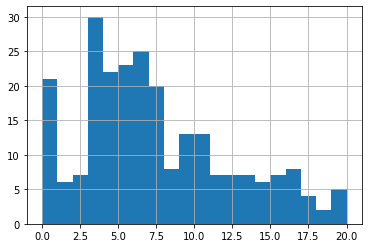

In [174]:
protein = df.loc[:, "Protein_g"]
protein.hist(bins=20) # Create a histogram with 20 equally spaced bins for the data

<AxesSubplot:>

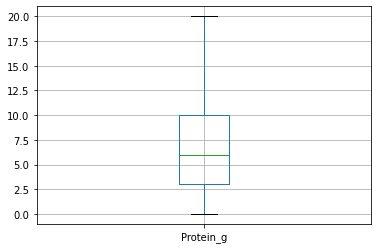

In [175]:
subplot = df[["Protein_g"]] # Notice another way to get desired column
subplot.boxplot() # Boxplots give median value, middle 50% of data, and range of non-outliers

# Putting it all together

We'll try putting it all together with a new dataset, the Titanic dataset.  This dataset has survival data on all the passengers on the Titanic.  It also has information like the gender of the passenger and how much they paid for a ticket.

We can explore this data with the question, are there variables that tend to predict survival for certain passengers?  Specificallly, did gender, age, or class matter in who survived?

The data is in a CSV file, so we can load that up first.

In [ ]:
# Skip this cell if not working in Google Colab
from google.colab import files

uploaded = files.upload() # pick titanic.csv

Some relevant variables to us are Survived (1 if they did, 0 if they didn't), Pclass (1st, 2nd, or 3rd class), Sex, and Age.  The variables we'll ignore are SibSp (how many siblings or spouses on the Titanic), Parch (number of parents or children on the Titanic), Ticket number, the fare paid, the cabin number, and the port of embarkation.

In [176]:
import pandas as pd
df = pd.read_csv('titanic.csv', index_col = 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We next make sure there's nothing unexpected about the column names or the types of these columns.  Aside from sex being a string instead of a more convenient number, everything here is as expected.

In [177]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [178]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

What is the overall average survival rate?  The average age?  We can use describe() to get a sense of the numeric variables.

In [179]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now, what was correlated with survival?  We can use df.corr() to see.

In [180]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


It looks like age doesn't have much relationship with the survived variable, but Pclass has a weak negative correlation with it (third class has lower survival than first).

Sex isn't in the table because it's not numeric.  But we can compute the survival rates separately for men and women.

In [181]:
males = df[df['Sex'] == 'male']
males

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [182]:
males.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [183]:
females = df[df['Sex'] == 'female']
females.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000
mean,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
std,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698
min,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875
50%,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000
max,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


That's certainly a larger survival rate for women.  Can we compute a correlation?

We can, as long as we create a new column for our table with numeric values instead of strings.  We can create a boolean column of True and False for df['Sex'] == 'female', then add this column to our dataframe by assigning it to a new column name.  The boolean values will be interpreted as 0 and 1 for the correlation.

In [185]:
df['sex_numeric'] = df['Sex'] == 'female'

In [186]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_numeric
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333
sex_numeric,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000


That's a pretty strong correlation, the strongest in the table.

Circling back to the class of cabin, we could visualize the three survival rates using the built-in histogram method.

<AxesSubplot:>

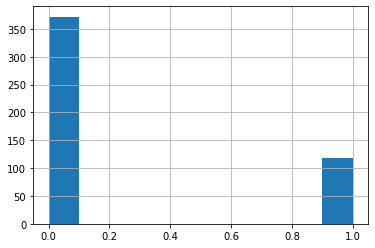

In [187]:
third_class = df[df['Pclass'] == 3]
second_class = df[df['Pclass'] == 2]
first_class = df[df['Pclass'] == 1]
third_class['Survived'].hist()

<AxesSubplot:>

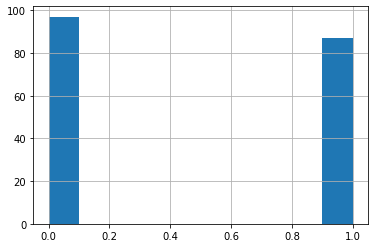

In [188]:
second_class['Survived'].hist()

<AxesSubplot:>

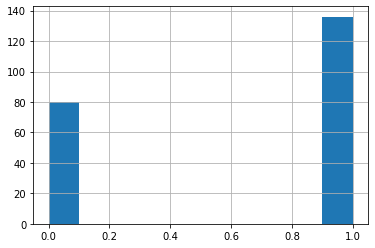

In [189]:
first_class['Survived'].hist()

# More to come

We'll return to all this later - DataFrames have quite a lot that they can do.